In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [39]:
data = pd.read_csv('ORCL.csv') 

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [41]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') 
data = data.dropna() 
ORCL = data.iloc[:,4:5].values 

In [42]:
sc = MinMaxScaler(feature_range=(0,1))
ORCL = sc.fit_transform(ORCL)
ORCL.shape

(252, 1)

In [44]:
X_train = []
y_train = []

for i in range (60,200): 
    X_train.append(ORCL[i-60:i,0]) 
    y_train.append(ORCL[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [45]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(140, 60, 1)

In [46]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [47]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
5/5 - 14s - loss: 0.1683 - 14s/epoch - 3s/step
Epoch 2/20
5/5 - 2s - loss: 0.0427 - 2s/epoch - 409ms/step
Epoch 3/20
5/5 - 2s - loss: 0.0539 - 2s/epoch - 418ms/step
Epoch 4/20
5/5 - 2s - loss: 0.0264 - 2s/epoch - 464ms/step
Epoch 5/20
5/5 - 2s - loss: 0.0142 - 2s/epoch - 415ms/step
Epoch 6/20
5/5 - 2s - loss: 0.0245 - 2s/epoch - 415ms/step
Epoch 7/20
5/5 - 2s - loss: 0.0147 - 2s/epoch - 348ms/step
Epoch 8/20
5/5 - 2s - loss: 0.0151 - 2s/epoch - 416ms/step
Epoch 9/20
5/5 - 2s - loss: 0.0143 - 2s/epoch - 432ms/step
Epoch 10/20
5/5 - 2s - loss: 0.0100 - 2s/epoch - 397ms/step
Epoch 11/20
5/5 - 2s - loss: 0.0097 - 2s/epoch - 467ms/step
Epoch 12/20
5/5 - 2s - loss: 0.0107 - 2s/epoch - 401ms/step
Epoch 13/20
5/5 - 2s - loss: 0.0069 - 2s/epoch - 403ms/step
Epoch 14/20
5/5 - 2s - loss: 0.0096 - 2s/epoch - 393ms/step
Epoch 15/20
5/5 - 2s - loss: 0.0093 - 2s/epoch - 411ms/step
Epoch 16/20
5/5 - 2s - loss: 0.0060 - 2s/epoch - 410ms/step
Epoch 17/20
5/5 - 2s - loss: 0.0070 - 2s/epoch - 3

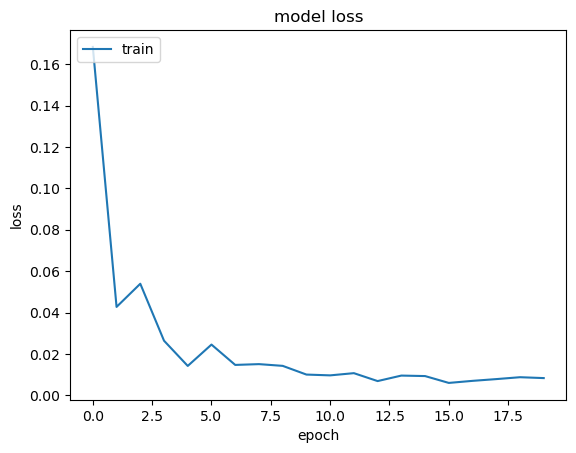

In [67]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [69]:
ORCL = pd.read_csv('ORCL.csv') #importing the test data
ORCL["Close"]=pd.to_numeric(ORCL.Close,errors='coerce') #turning the close column to numerical type
ORCL = ORCL.dropna() #droping the NA values
ORCL = ORCL.iloc[:,4:5] #selecting the closing prices for testing
y_test = ORCL.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = ORCL.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(ORCL)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [71]:
y_pred = model.predict(X_test) 

6/6 [==============================] - 0s 67ms/step


In [72]:
predicted_price = sc.inverse_transform(y_pred) 

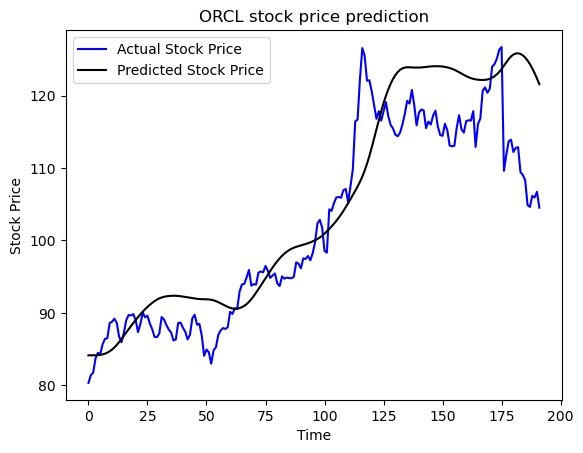

In [77]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'black', label = 'Predicted Stock Price')
plt.title('ORCL stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()